In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# ! pip install tensorflow
# ! pip install tensorflow-gpu
# ! pip install keras-tuner 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential

In [6]:
from keras_tuner import RandomSearch

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
 
df0 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/0.csv")
df0 = df0.drop(df0.columns[0], axis=1)  

df1 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/1.csv")
df1 = df1.drop(df1.columns[0], axis=1)  

df2 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/2.csv")
df2 = df2.drop(df2.columns[0], axis=1)  

df3 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/3.csv")
df3 = df3.drop(df3.columns[0], axis=1)  

df4 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/4.csv")
df4 = df4.drop(df4.columns[0], axis=1)  

d0 = np.array(df0)
d1 = np.array(df1)
d2 = np.array(df2)
d3 = np.array(df3)
d4 = np.array(df4)

In [9]:
X_train = []
Y_train = []

for i in range(1200):
  X_train.append(d0[i])
  Y_train.append(0)

  X_train.append(d1[i])
  Y_train.append(1)

  X_train.append(d2[i])
  Y_train.append(2)

  X_train.append(d3[i])
  Y_train.append(3)

  X_train.append(d4[i])
  Y_train.append(4)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [10]:
X_test = []
Y_test = []

for i in range(300):
  X_test.append(d0[1200+i])
  Y_test.append(0)

  X_test.append(d1[1200+i])
  Y_test.append(1)

  X_test.append(d2[1200+i])
  Y_test.append(2)

  X_test.append(d3[1200+i])
  Y_test.append(3)

  X_test.append(d4[1200+i])
  Y_test.append(4)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [11]:
mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [12]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

In [13]:
def MLP1_tuning(hp):
  model = Sequential()
  model.add(Dense(hp.Int('hidden layer 1', min_value=500, max_value=2001, step=500), activation='relu', input_shape=(500, )))

  model.add(Dense(5, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [14]:
tuner = RandomSearch(MLP1_tuning,
                     objective='val_accuracy',
                     max_trials=100,
                     executions_per_trial=5,
                     project_name='tuning')

tuner.search(x=X_train, y=Y_train,
             epochs=100,
             batch_size=32,
             validation_data=(X_valid, Y_valid))  

Trial 4 Complete [00h 10m 12s]
val_accuracy: 0.6010666728019715

Best val_accuracy So Far: 0.6010666728019715
Total elapsed time: 00h 39m 38s
INFO:tensorflow:Oracle triggered exit


In [15]:
print('BEST PARAMETERS')
print('hidden layer 1:', tuner.get_best_hyperparameters()[0].values['hidden layer 1'])

BEST PARAMETERS
hidden layer 1: 1500


In [16]:
def MLP1():

  model = Sequential()
  model.add(Dense(1500, activation='relu', input_shape=(500,)))
  model.add(Dense(5, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1500)              751500    
                                                                 
 dense_3 (Dense)             (None, 5)                 7505      
                                                                 
Total params: 759,005
Trainable params: 759,005
Non-trainable params: 0
_________________________________________________________________
None






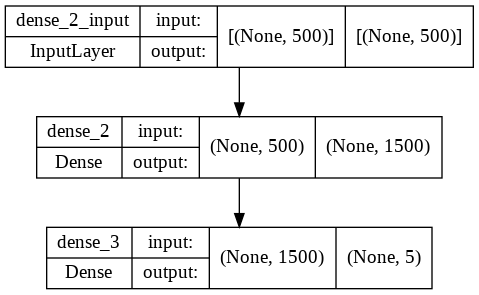

In [17]:
mlp1 = MLP1()
print(mlp1.summary())
print('\n')
print('\n')
plot_model(mlp1, to_file='mlp2.png', show_shapes=True, show_layer_names=True)

In [18]:
history = mlp1.fit(X_train, Y_train, 
                   batch_size=32,
                   epochs=100, 
                   validation_data=[X_valid, Y_valid],
                   verbose=1)

Epoch 1/100
188/188 [==============================] - 1s 6ms/step - loss: 1.1022 - accuracy: 0.5043 - val_loss: 1.1141 - val_accuracy: 0.5107
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 1.0402 - accuracy: 0.5220 - val_loss: 1.0286 - val_accuracy: 0.5267
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 1.0148 - accuracy: 0.5353 - val_loss: 0.9999 - val_accuracy: 0.5373
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 1.0004 - accuracy: 0.5420 - val_loss: 1.0027 - val_accuracy: 0.5427
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.9756 - accuracy: 0.5478 - val_loss: 0.9954 - val_accuracy: 0.5453
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.9669 - accuracy: 0.5458 - val_loss: 0.9787 - val_accuracy: 0.5427
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.9502 - accuracy: 0.5528 - val_loss: 0.9527 - val_accuracy: 0.5587

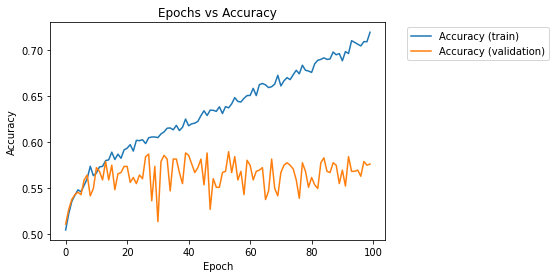

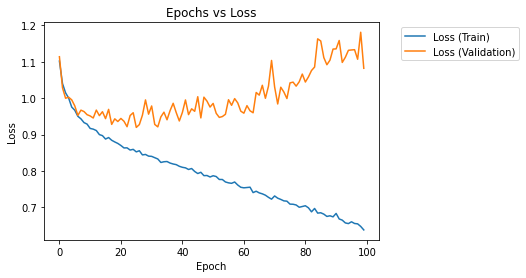

In [19]:
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (validation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.figure()

plt.plot(history.history['loss'], label='Loss (Train)')
plt.plot(history.history['val_loss'], label = 'Loss (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [20]:
Y_pred_train = np.argmax(mlp1.predict(X_train), axis=1)
Y_pred_test = np.argmax(mlp1.predict(X_test), axis=1)

print("Classification Report(Train)\n")
print(classification_report(Y_train, Y_pred_train))

print('\n')

print("Classification Report(Test)\n")
print(classification_report(Y_test, Y_pred_test))

Classification Report(Train)

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1200
           1       0.73      0.49      0.58      1200
           2       0.93      0.87      0.90      1200
           3       0.72      0.77      0.74      1200
           4       0.69      0.85      0.76      1200

    accuracy                           0.74      6000
   macro avg       0.74      0.74      0.73      6000
weighted avg       0.74      0.74      0.73      6000



Classification Report(Test)

              precision    recall  f1-score   support

           0       0.51      0.58      0.54       150
           1       0.43      0.39      0.41       150
           2       0.78      0.69      0.73       154
           3       0.70      0.59      0.64       148
           4       0.53      0.64      0.58       148

    accuracy                           0.58       750
   macro avg       0.59      0.58      0.58       750
weighted avg    

Train CM


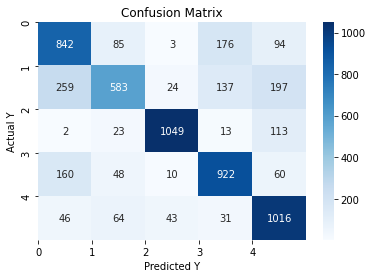





Test CM


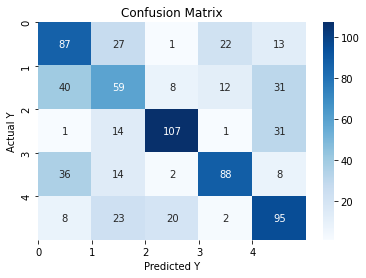

In [21]:
print('Train CM')
cm = confusion_matrix(Y_train, Y_pred_train)

sns.heatmap(cm, annot=True, fmt='.4g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(5));
plt.yticks(np.arange(5));
plt.show()

print('\n')
print('\n')

print('Test CM')
cm = confusion_matrix(Y_test, Y_pred_test)

sns.heatmap(cm, annot=True, fmt='.3g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(5));
plt.yticks(np.arange(5));

plt.show()